In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate

Para unidades de MeV y femtometros y una partícula siendo un electrón.

Hacemos un cambio de unidades de modo que:

$[E]=1MeV=1.60218\times 10^{-13}J$ - Energía

$[T]=6.58210\times 10^{-22} s$ - Tiempo

$[L]=1fm=10^{-15}m$ - Longitud

$[M]=6.941099\times10^{-26}kg$ - Masa

Así:

$\hbar=1$ 

$m=0.02415$ Masa del proton

$V(x)=\frac{1}{2}m\omega^2 x^2$ Valor del potencial dentro del pozo

In [2]:
m = 0.02415
hbar = 1.
w = 1. 
h = 1E-4
Xmax = 50.
Xmatch = 1.

In [3]:
def V(x):
    v = 0.5*m*w**2.*x**2.
    return v

def k2(E,x):
    K2 = (2.*m/hbar**2.)*(V(x)-E)
    return K2

def RK2(psi0,psi1,x,h,E):
    l1 = h*psi1
    q1 = h*k2(E,x)*psi0
    q2 = h*k2(E,x+0.5*h)*(psi0+0.5*l1)
    
    psi0 = psi0 + l1 + 0.5*h*q1
    psi1 = psi1 + q2
    return psi0,psi1

def intRK2(E,x,h):
    psi0,psi1 = 0.,abs(h)
    PSI = [psi0,psi1]
    X = [x,x+h]
    Arr = np.arange(x+2*h,Xmatch+h,h)
    for x in Arr:
        psi0,psi1 = RK2(psi0,psi1,x,h,E)
        PSI.append(psi0), X.append(x)
    return PSI,X

def Biseccion(f,a, b,TOL=1.E-7, N=100):
    i = 1
    FA = f(a)
    while(i<=N):
        p = a + (b-a)/2.0
        FP = f(p)
        if (FP == 0.0) or ((b-a)/2.0 < TOL):
            j = 1
            break
        i = i+1
        if (FA * FP > 0.0):	
            a = p
            FA = FP
        else:
            b=p
    return p

def logDeriv(E):
    PSIr,Xr = intRK2(E,Xmax,-h)
    PSIl,Xl = intRK2(E,-Xmax,h)
    difPsir = np.diff(PSIr)/np.diff(Xr)
    difPsil = np.diff(PSIl)/np.diff(Xl)
    LCoef = difPsil[-1]/PSIl[-1]
    RCoef = difPsir[-1]/PSIr[-1]
    Delta = (LCoef-RCoef)/(LCoef+RCoef)
    return Delta

def Normalize(F):
    F2=np.array(F)**2.    
    I= scipy.integrate.simps(F2,dx=h)
    F=F/np.sqrt(I)
    return F

In [4]:
Energy = np.linspace(0,10,100)
Del = []
for i in range(len(Energy)):
    Del.append(logDeriv(Energy[i]))

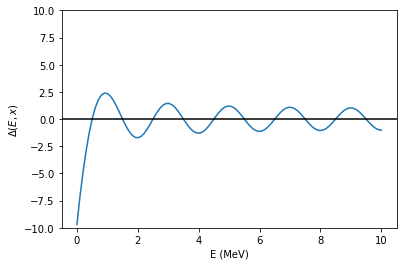

In [5]:
plt.plot(Energy,Del)
plt.axhline(y=0.,color='k')
plt.xlabel('E (MeV)')
plt.ylabel(r'$\Delta(E,x)$')
plt.ylim(-10,10)
plt.show()

In [6]:
# Energias
E0 = Biseccion(logDeriv,0.,0.7)
E1 = Biseccion(logDeriv,1.,2.)
E2 = Biseccion(logDeriv,2.,3.)
E3 = Biseccion(logDeriv,3.,4.)
E4 = Biseccion(logDeriv,4.,5.)
E5 = Biseccion(logDeriv,5.,6.)

E = [E0,E1,E2,E3,E4,E5]
n = 0
for e in E:
    print('n: %i ; E=% f'%(n,e))
    n +=1

n: 0 ; E= 0.499996
n: 1 ; E= 1.499983
n: 2 ; E= 2.499988
n: 3 ; E= 3.499976
n: 4 ; E= 4.499982
n: 5 ; E= 5.499971


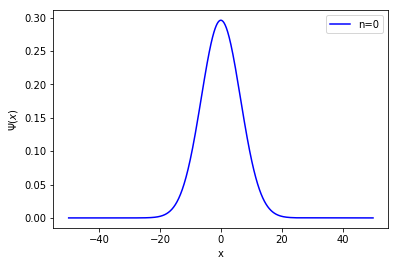

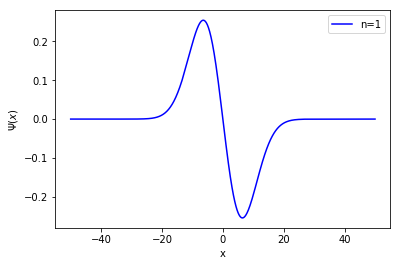

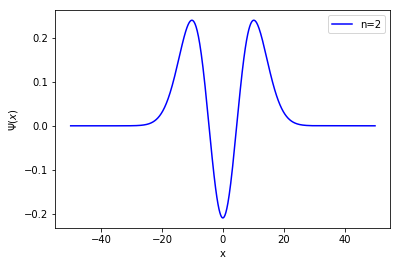

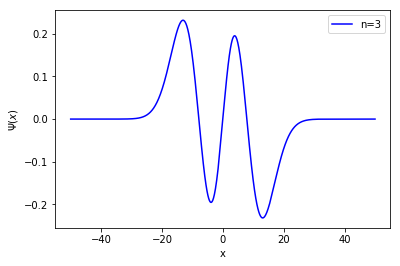

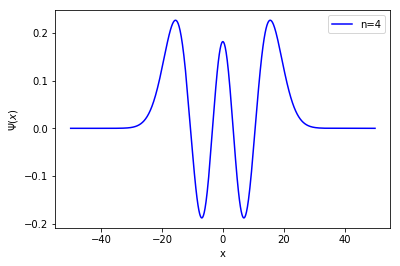

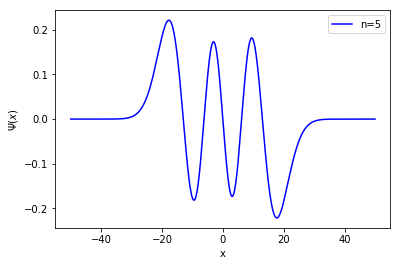

In [7]:
for i in range(len(E)):
    PSIr,Xr = intRK2(E[i],Xmax,-h)
    PSIl,Xl = intRK2(E[i],-Xmax,h)
    
    if i%2==0:
        PSI = [-psir for psir in PSIr] + PSIl[::-1]
    else:
        PSI = PSIr + PSIl[::-1]
    PSI = Normalize(PSI)
    X = Xr + Xl[::-1]

    plt.plot(X,PSI,'b', label = 'n=%i'%i)
    plt.xlabel('x')
    plt.ylabel(r'$\Psi(x)$')
    plt.legend()
    plt.show()